<a href="https://colab.research.google.com/github/Bubukisapisa/ML_education/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('drive/MyDrive/ML for people/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
obj_columns = cars_df.select_dtypes(include='object')
obj_columns.apply(lambda col: col.map(type).unique())

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


In [7]:
cars_df.apply(lambda col: len(col.unique()))

,0
Car_ID,100
Brand,11
Model,58
Year,6
Kilometers_Driven,18
Fuel_Type,2
Transmission,2
Owner_Type,3
Mileage,15
Engine,36


В наборі 8 числових та 6 категоріальних колонок:


*   2 бінарних (мають лише 2 значення)
*   3 мультикатегоріальних колонок для яких немає поняття порядку
*   8 колонок для яких порядок грає роль - колонки Year, Kilometers_Driven, Owner_Type, Mileage, Engine,	Power,	Seats,	Price



**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [8]:
input = cars_df.drop(columns='Price')
target = cars_df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(input, target, train_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
cars_df[['Fuel_Type']].value_counts()
cars_df[['Transmission']].value_counts()

,count
Transmission,
Automatic,57
Manual,43


In [10]:

fuel_replacer = {'Petrol': 1, 'Diesel': 0}
trans_replacer = {'Automatic': 1, 'Manual': 0}

X_train['Fuel_Type'] = X_train['Fuel_Type'].map(fuel_replacer)
X_train['Transmission'] = X_train['Transmission'].map(trans_replacer)

X_test['Fuel_Type'] = X_test['Fuel_Type'].map(fuel_replacer)
X_test['Transmission'] = X_test['Transmission'].map(trans_replacer)

In [11]:
enc = OneHotEncoder()
enc.fit(X_train[['Brand']])
brand_enc_train = enc.transform(X_train[['Brand']]).toarray()
brand_enc_test = enc.transform(X_test[['Brand']]).toarray()

In [12]:
X_train[enc.categories_[0]] = brand_enc_train
X_test[enc.categories_[0]] = brand_enc_test

In [13]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
35,36,Volkswagen,Ameo,2020,15000,1,1,Third,19,1197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,88,Toyota,Camry,2016,38000,1,1,Second,19,2487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93,94,Audi,A5,2018,28000,0,1,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,Toyota,Corolla,2018,50000,1,0,First,15,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,75,Audi,A3,2017,38000,1,1,Second,16,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [15]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
35,36,Volkswagen,Ameo,2020,15000,1,1,Third,19,1197,74,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
87,88,Toyota,Camry,2016,38000,1,1,Second,19,2487,176,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
93,94,Audi,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,Toyota,Corolla,2018,50000,1,0,First,15,1498,108,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,75,Audi,A3,2017,38000,1,1,Second,16,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [16]:
pd.concat([X_train.select_dtypes([int,float]), y_train], axis=1).corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Power,0.832541
Engine,0.676306
Transmission,0.641369
Mercedes,0.483855
BMW,0.467860
Car_ID,0.414462
Audi,0.195941
Ford,0.178891
Toyota,0.017995


Найбільше корелюють з ціною колонки Power, Engine (пряма кореляція).
Колонка Mileage має обернену кореляцію.

Дорогі бренди машин мають пряму кореляцію, бюджетні - обернену. Також показує що Car_id має досить сильну позитивну кореляцію хоча id немає жодного відношення до ціни машини.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [17]:
X_train.drop(columns = X_train.select_dtypes(exclude=[int,float]).columns, inplace = True)
X_test.drop(columns = X_test.select_dtypes(exclude=[int,float]).columns, inplace = True)

# X_train.drop(columns = 'Car_ID', inplace=True)
# X_test.drop(columns = 'Car_ID', inplace=True)

X_train.head()

,Car_ID,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
35,36,2020,15000,1,1,19,1197,74,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
87,88,2016,38000,1,1,19,2487,176,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
93,94,2018,28000,0,1,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,2018,50000,1,0,15,1498,108,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,75,2017,38000,1,1,16,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
model = LinearRegression().fit(X_train, y_train)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

loss_train = mean_squared_error(y_train, train_predict)**0.5
loss_test = mean_squared_error(y_test, test_predict)**0.5

print(f'RMSE for train dataset: {loss_train}')
print(f'RMSE for test dataset: {loss_test}')

print(np.std(y_test))
print(np.mean(y_test))

print(np.std(y_train))
print(np.mean(y_train))

RMSE for train dataset: 1.1151007970493857e-07
RMSE for test dataset: 583242.9722376146
Price    981172.568601
dtype: float64
1545625.0
Price    1.041978e+06
dtype: float64
1687500.0


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


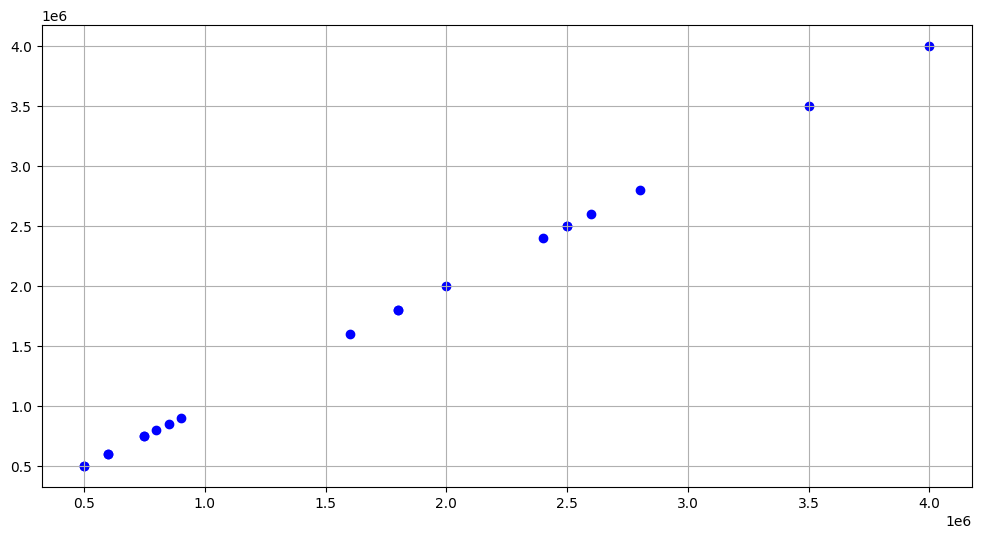

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, train_predict, color='blue', label='Data points')
plt.grid(True)
plt.show()

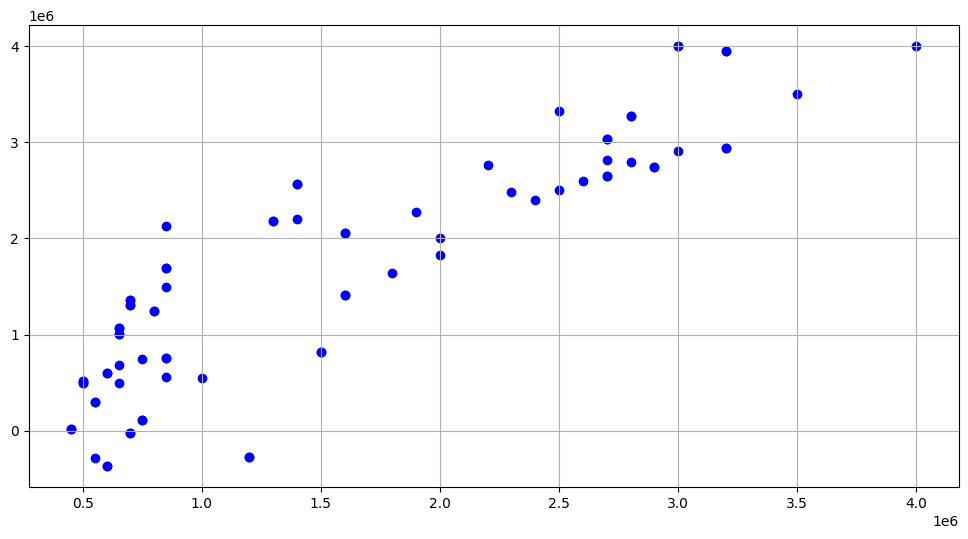

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predict, color='blue', label='Data points')
plt.grid(True)
plt.show()

RMSE for test dataset: 583242.9722376146 - велике значення. Але воно майже вдвоє менше стандартного відхилення для тестового набору даних. Графік наче теж свідчить що модель впоралась непогано. Можливо помилка така велика через масштаб цільового показника.

Тому, хоч і маю сумніви, проте, все ж, роблю висновок що модель впоралась непогано.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [21]:
num_col_train = X_train[X_train.columns[1:9]]
num_col_test = X_test[X_test.columns[1:9]]

scaler = StandardScaler().fit(num_col_train)

inputs_train = scaler.transform(num_col_train)
inputs_test = scaler.transform(num_col_test)

X_train_scaled = np.concat((inputs_train, X_train[X_train.columns[9:]].values), axis=1)

model_scl = LinearRegression().fit(X_train_scaled, y_train)
model_scl.coef_

array([[ -262610.63284105,  -210781.47707172,  -135495.48335394,
           24626.26682363,  -119089.50961978,  -158747.52372094,
          795290.23705591,   236491.31809789,   515519.71154583,
          934032.39475561,  -970576.87974495,  -291844.99050407,
         -250417.38493806, -1020598.57523566,   353320.83529231,
          636818.40825378,   -34996.9753474 ,   119301.7048903 ,
            9441.75103231,   -96157.2026417 ]])

In [22]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns[1:], 1),
    'weight': np.append(model_scl.coef_, model_scl.intercept_)
})
weights_df.sort_values('weight', ascending=False)


,feature,weight
20,1,1.628230e+06
9,BMW,9.340324e+05
6,Power,7.952902e+05
15,Mercedes,6.368184e+05
8,Audi,5.155197e+05
14,Maruti,3.533208e+05
7,Seats,2.364913e+05
17,Toyota,1.193017e+05
3,Transmission,2.462627e+04
18,Volkswagen,9.441751e+03


Найбільше в сторону збільшення і зменшення ціни впливають марки машин, напевно це логічно з точки зору того що машина вищого сегменту коштуватиме дорожче, але я очікував що в топі будуть саме якісні показники такі як двигун, пробіг, потужність.
Незрозуміло чому обєм двигуна впливає на ціну в бік зменшення, кількість сидін впливає суттєво на збільшення ціни (логічно але те що це визначальний показник для мене неочікувано)

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [24]:
X = X_train_scaled
Y =  y_train

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

,0
const,1.432188e+06
x1,-2.292991e+05
x2,-1.860219e+05
x3,-1.503211e+05
x4,-8.302848e+03
x5,-1.200492e+05
x6,-4.075543e+04
x7,7.330349e+05
x8,1.959481e+05
x9,7.500643e+05


In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.009e+28
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.83e-15
Time:                        19:20:00   Log-Likelihood:                 368.20
No. Observations:                  20   AIC:                            -698.4
Df Residuals:                       1   BIC:                            -679.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.432e+06   6.88e-09   2.08e+14      0.0

Схоже що всі коефіцієнти є стат значущими, значення p < 0.05

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

не робив бо, схоже в попередніх завданнях допустив помилку, але як перевірити це не знаю

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?